In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler #从preprocessing库导入MinMaxScaler函数
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

#数据导入和查看
dateparse=lambda dates: pd.datetime.strptime(dates,'%Y-%m')
data1=pd.read_excel('demo2.xlsx',parse_dates=['Month'],index_col='Month',date_parser=dateparse)
data1 = data1.sort_values(by='Month', ascending=True)

C:\Users\zyaaa\AppData\Local\Temp/ipykernel_28648/1426331097.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse=lambda dates: pd.datetime.strptime(dates,'%Y-%m')


In [2]:
'''
#画热力图
hitmapTemp = data1[list(data1.columns)]
hitmapData = hitmapTemp.corr()

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题
plt.subplots(figsize=(5,5),dpi=1080,facecolor='w')# 设置画布大小，分辨率，和底色
p1 = sns.heatmap(hitmapData ,annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
'''

'\n#画热力图\nhitmapTemp = data1[list(data1.columns)]\nhitmapData = hitmapTemp.corr()\n\nplt.rcParams[\'font.sans-serif\'] = [\'SimHei\']  # 黑体\nplt.rcParams[\'axes.unicode_minus\'] = False    # 解决无法显示符号的问题\nsns.set(font=\'SimHei\', font_scale=0.8)        # 解决Seaborn中文显示问题\nplt.subplots(figsize=(5,5),dpi=1080,facecolor=\'w\')# 设置画布大小，分辨率，和底色\np1 = sns.heatmap(hitmapData ,annot=True, vmax=1, square=True, cmap="Blues", fmt=\'.2g\')\n'

In [3]:
values = data1.values
# 确保所有数据是浮点数类型
values = values.astype('float32')

# # 对特征标准化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# 分离出特征和标签
data = scaled
label = scaled[:, 0]

In [4]:
def generate_pair(x, y, ts):
    length = len(x)
    start, end = 0, length - ts
    data = []
    label = []
    for i in range(end):
        data.append(x[i: i+ts, :])
        label.append(y[i+ts])
    return np.array(data, dtype=np.float64), np.array(label, dtype=np.float64)

data, label = generate_pair(data, label, ts=20)

In [5]:
# 划分数据集
train_test_split = int(0.7 * len(label))
train_X = data[0: train_test_split]
train_y = label[0: train_test_split]
test_X = data
test_y = label

'''超参数优化
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))

    grid_model.compile(loss = 'mse',optimizer = optimizer)
    return grid_model

grid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(test_X,test_y))
parameters = {'batch_size' : [10,100],
              'epochs' : [10,100],
              'optimizer' : ['adam','Adadelta'] }

grid_search  = GridSearchCV(estimator = grid_model,
                            param_grid = parameters,
                            cv = 2)
'''

"超参数优化\ndef build_model(optimizer):\n    grid_model = Sequential()\n    grid_model.add(LSTM(50,return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))\n    grid_model.add(LSTM(50))\n    grid_model.add(Dropout(0.2))\n    grid_model.add(Dense(1))\n\n    grid_model.compile(loss = 'mse',optimizer = optimizer)\n    return grid_model\n\ngrid_model = KerasRegressor(build_fn=build_model,verbose=1,validation_data=(test_X,test_y))\nparameters = {'batch_size' : [10,100],\n              'epochs' : [10,100],\n              'optimizer' : ['adam','Adadelta'] }\n\ngrid_search  = GridSearchCV(estimator = grid_model,\n                            param_grid = parameters,\n                            cv = 2)\n"

Epoch 1/100
8/8 - 5s - loss: 0.2965 - val_loss: 0.2478 - 5s/epoch - 566ms/step
Epoch 2/100
8/8 - 0s - loss: 0.2121 - val_loss: 0.1956 - 450ms/epoch - 56ms/step
Epoch 3/100
8/8 - 0s - loss: 0.2086 - val_loss: 0.2408 - 428ms/epoch - 53ms/step
Epoch 4/100
8/8 - 0s - loss: 0.1781 - val_loss: 0.1905 - 424ms/epoch - 53ms/step
Epoch 5/100
8/8 - 0s - loss: 0.1922 - val_loss: 0.2200 - 439ms/epoch - 55ms/step
Epoch 6/100
8/8 - 0s - loss: 0.1829 - val_loss: 0.2094 - 430ms/epoch - 54ms/step
Epoch 7/100
8/8 - 0s - loss: 0.1552 - val_loss: 0.2068 - 441ms/epoch - 55ms/step
Epoch 8/100
8/8 - 0s - loss: 0.1634 - val_loss: 0.2300 - 430ms/epoch - 54ms/step
Epoch 9/100
8/8 - 0s - loss: 0.1433 - val_loss: 0.2327 - 457ms/epoch - 57ms/step
Epoch 10/100
8/8 - 1s - loss: 0.1388 - val_loss: 0.2257 - 504ms/epoch - 63ms/step
Epoch 11/100
8/8 - 0s - loss: 0.1180 - val_loss: 0.2525 - 498ms/epoch - 62ms/step
Epoch 12/100
8/8 - 1s - loss: 0.1268 - val_loss: 0.2259 - 586ms/epoch - 73ms/step
Epoch 13/100
8/8 - 1s - los

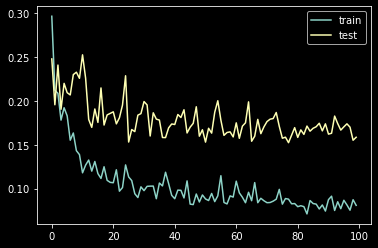

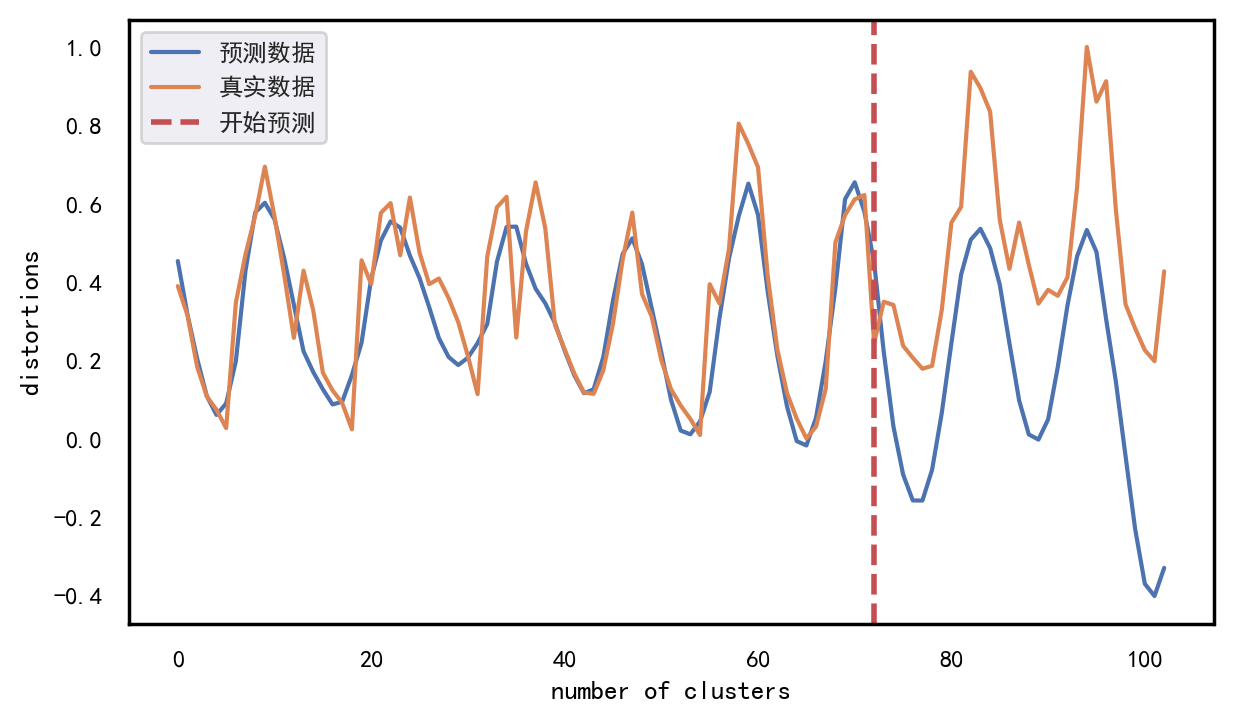

In [6]:
model = Sequential()
model.add(LSTM(256, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')


# 训练模型

if __name__ == '__main__':
    history = model.fit(train_X, train_y, epochs=100, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=True)

    # 开始预测
    yhat = model.predict(test_X) 
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()

    
    #设置背景色
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
    plt.rcParams['axes.unicode_minus'] = False    # 解决无法显示符号的问题
    sns.set(font='SimHei', font_scale=0.8)        # 解决Seaborn中文显示问题

    fig = plt.figure(dpi=200,figsize=(7,4))
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.spines['right'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['left'].set_color('black')

    plt.xlabel('number of clusters',color='black')
    plt.ylabel('distortions',color='black')
    #设置横纵坐标轴的颜色
    plt.tick_params(axis='x',colors='black')
    plt.tick_params(axis='y',colors='black')
    
    plt.plot(yhat[train_test_split-72: train_test_split+72])
    plt.plot(test_y[train_test_split-72: train_test_split+72])
    plt.axvline(x=72, c="r", ls="--", lw=2)
    plt.legend(['预测数据', '真实数据', '开始预测'])
    plt.grid()
    plt.show()


In [7]:
data_104=scaled[-20:,:]
data_103=data[102, :, :]
f1 = []
f1.append(data_103)
f1.append(data_104)
f1 = np.array(f1, dtype=np.float64)

In [8]:
f1_f = model.predict(f1)

1/1 [==============================] - 0s 26ms/step
